In [1]:

from sp_learn import run_learning
import matplotlib.pyplot as plt
import pandas as pd

def get_moving_average(series: list, window: int = 500):
    data = { 'values': series }
    df = pd.DataFrame(data)
    df['ma'] = df['values'].rolling(window).mean()
    return df['ma'].values
    

Combinations:  16


Episode Avg Reward: 0.62 | Total Target Hits: 4511: 100%|██████████| 5000/5000 [00:40<00:00, 123.96it/s]
Episode Avg Reward: 1.0 | Total Target Hits: 4628: 100%|██████████| 5000/5000 [00:47<00:00, 105.75it/s] 
Episode Avg Reward: 1.07 | Total Target Hits: 4538: 100%|██████████| 5000/5000 [00:37<00:00, 135.08it/s]
Episode Avg Reward: 1.06 | Total Target Hits: 4663: 100%|██████████| 5000/5000 [00:55<00:00, 89.94it/s] 
Episode Avg Reward: 1.14 | Total Target Hits: 4781: 100%|██████████| 5000/5000 [00:42<00:00, 116.93it/s]
Episode Avg Reward: 1.03 | Total Target Hits: 4805: 100%|██████████| 5000/5000 [00:46<00:00, 107.00it/s]
Episode Avg Reward: 1.2 | Total Target Hits: 4666: 100%|██████████| 5000/5000 [00:37<00:00, 132.37it/s] 
Episode Avg Reward: 0.17 | Total Target Hits: 2101: 100%|██████████| 5000/5000 [01:42<00:00, 48.75it/s] 
Episode Avg Reward: 1.12 | Total Target Hits: 4475: 100%|██████████| 5000/5000 [00:36<00:00, 135.64it/s]
Episode Avg Reward: 1.02 | Total Target Hits: 4368: 100

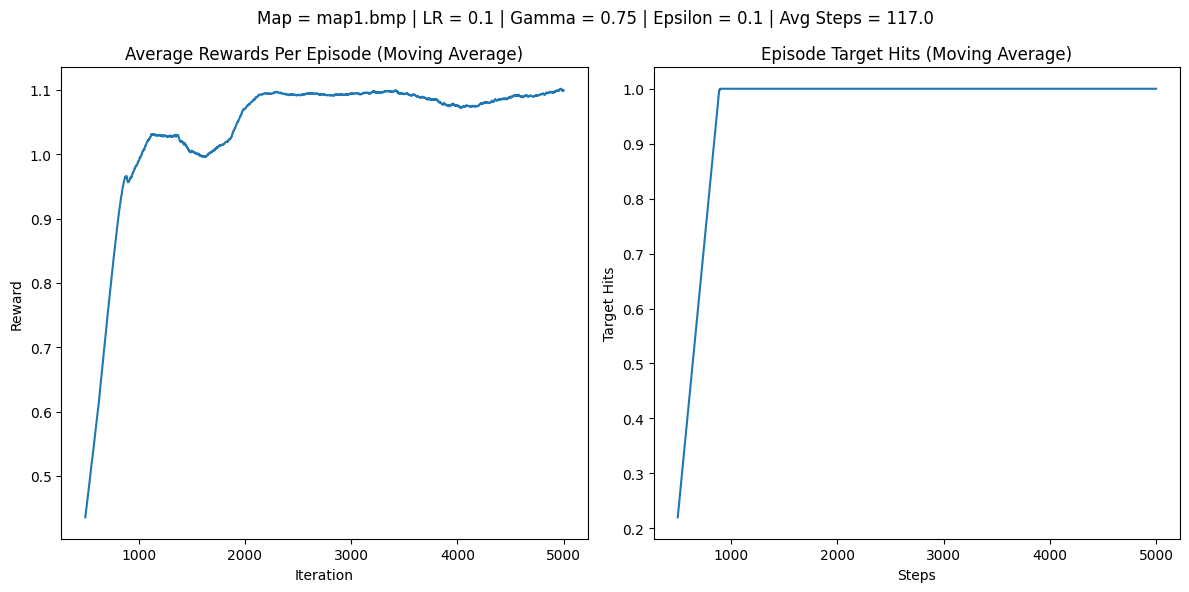

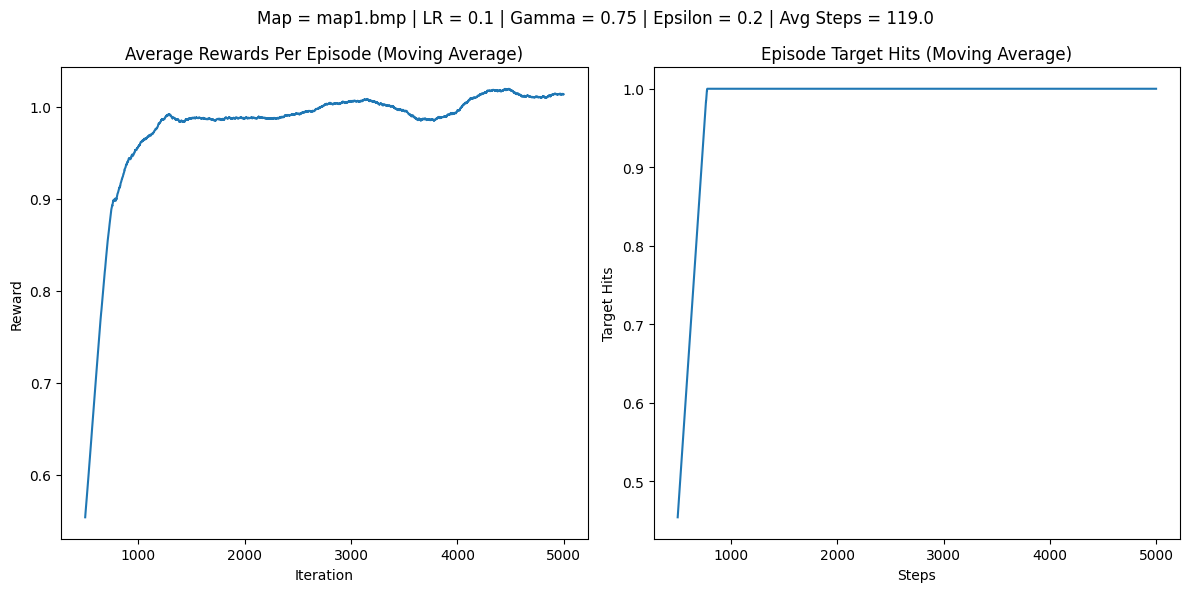

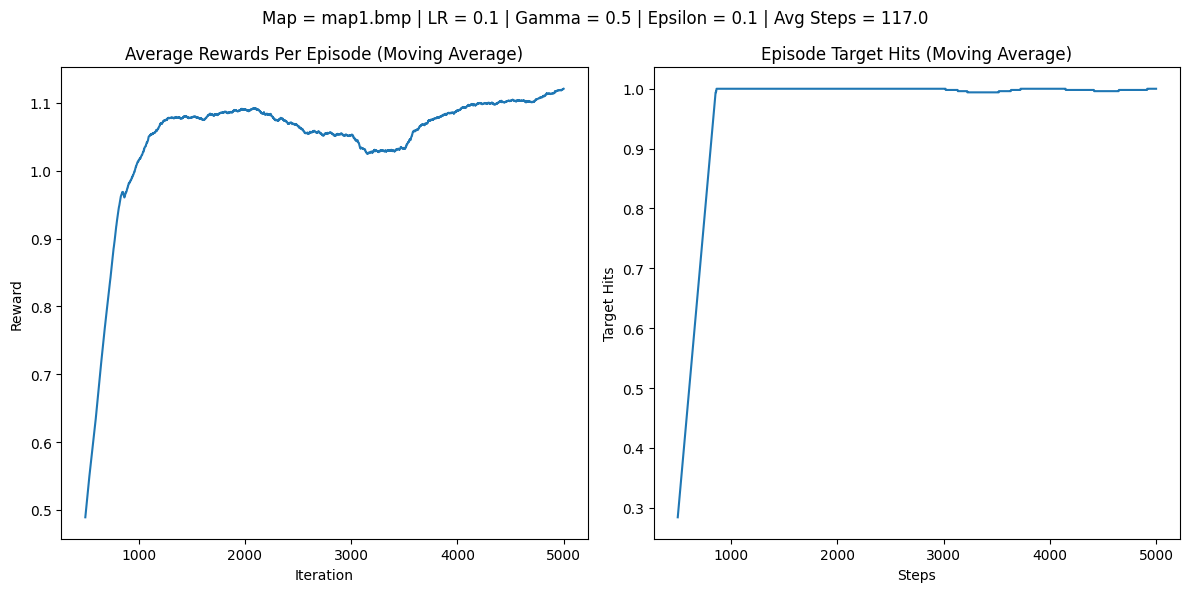

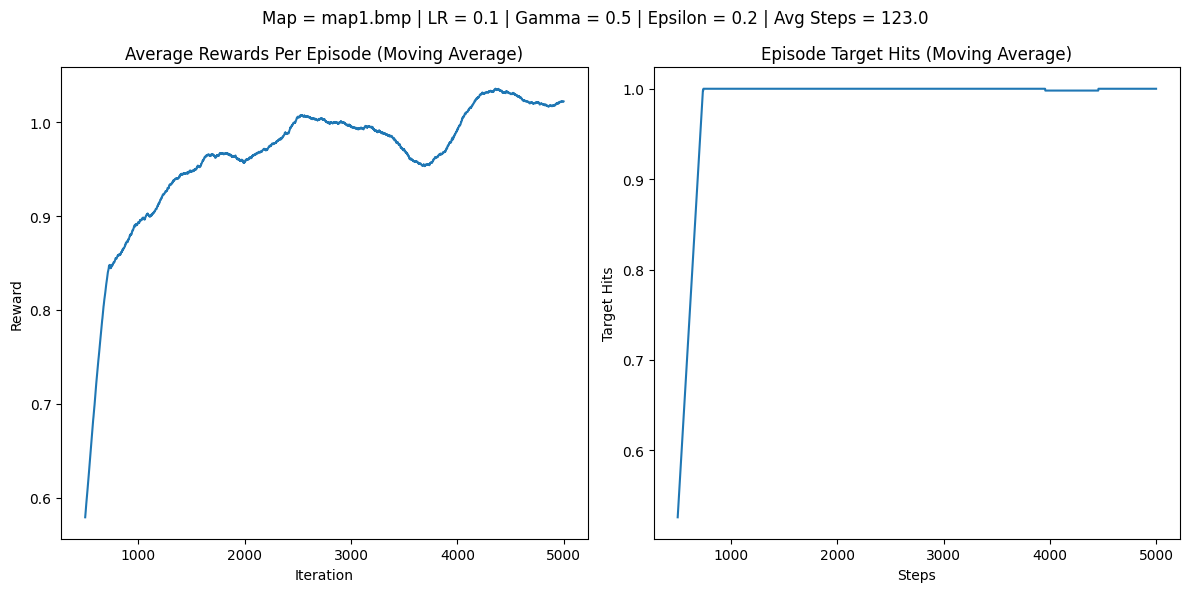

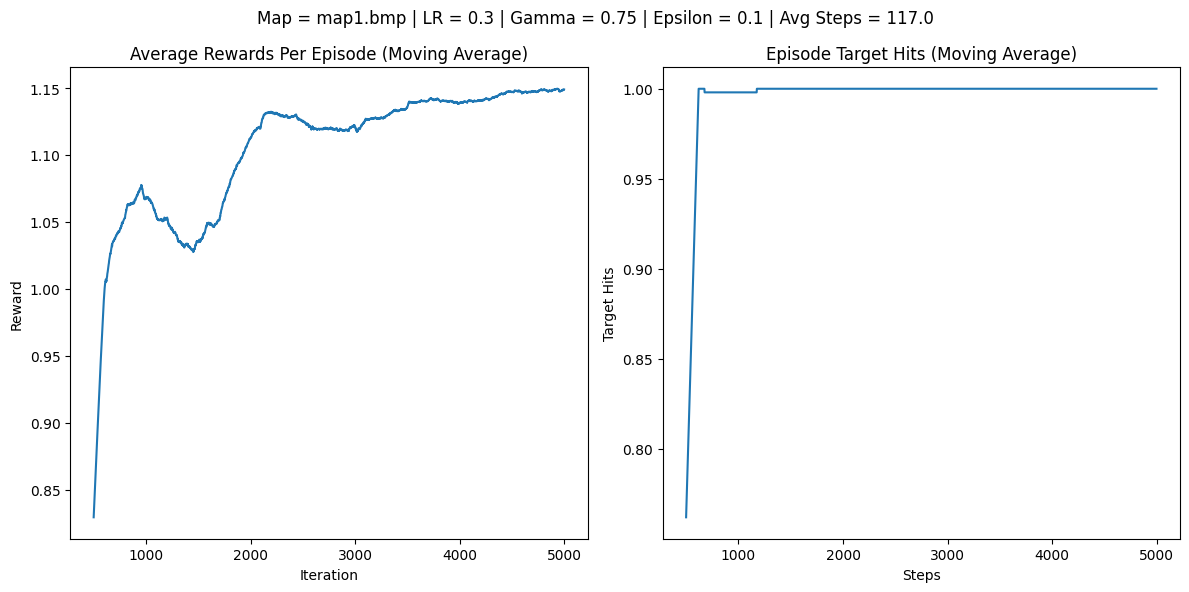

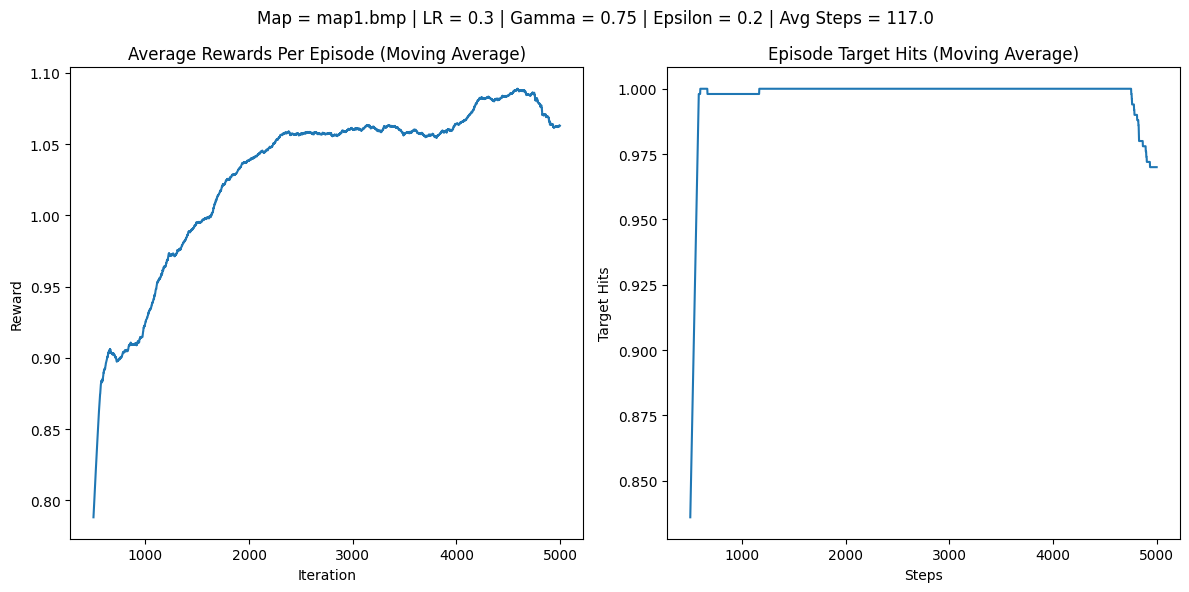

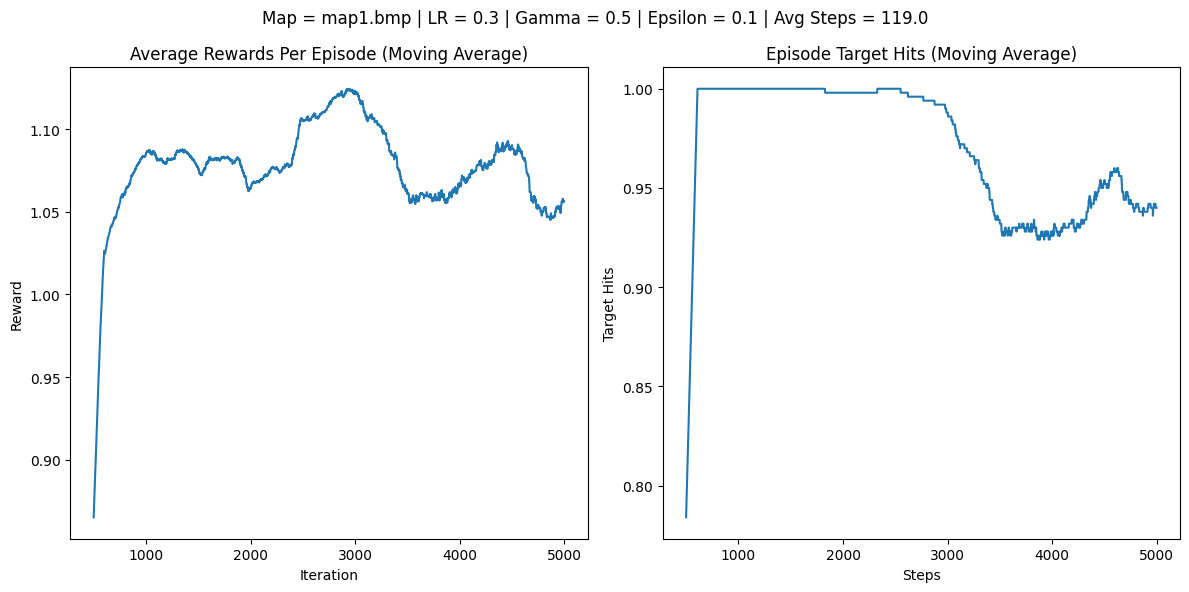

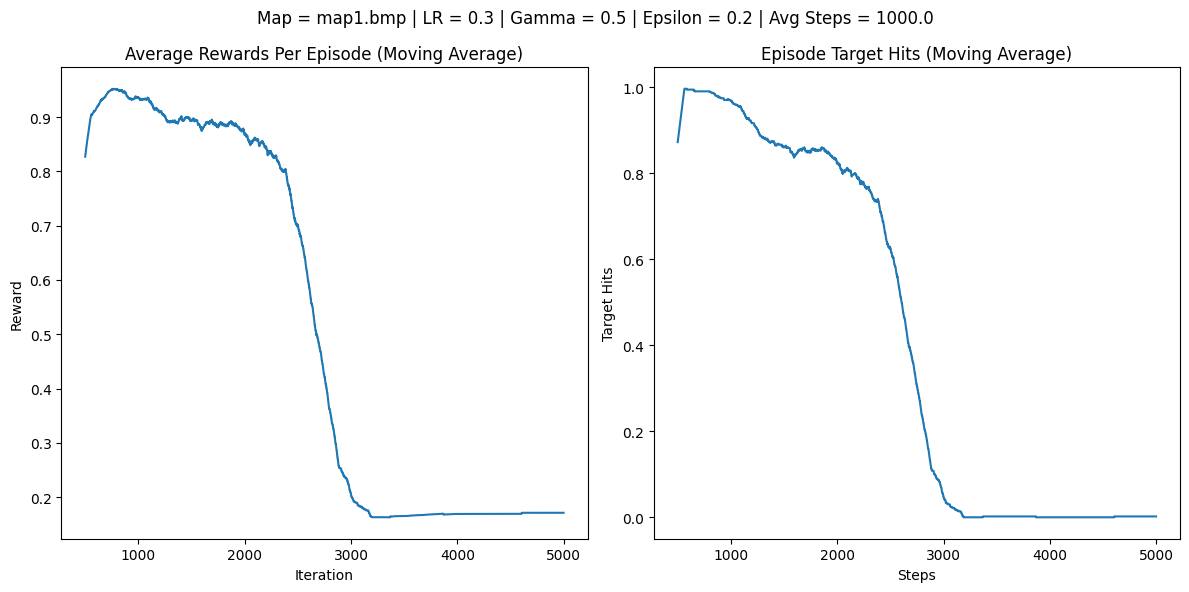

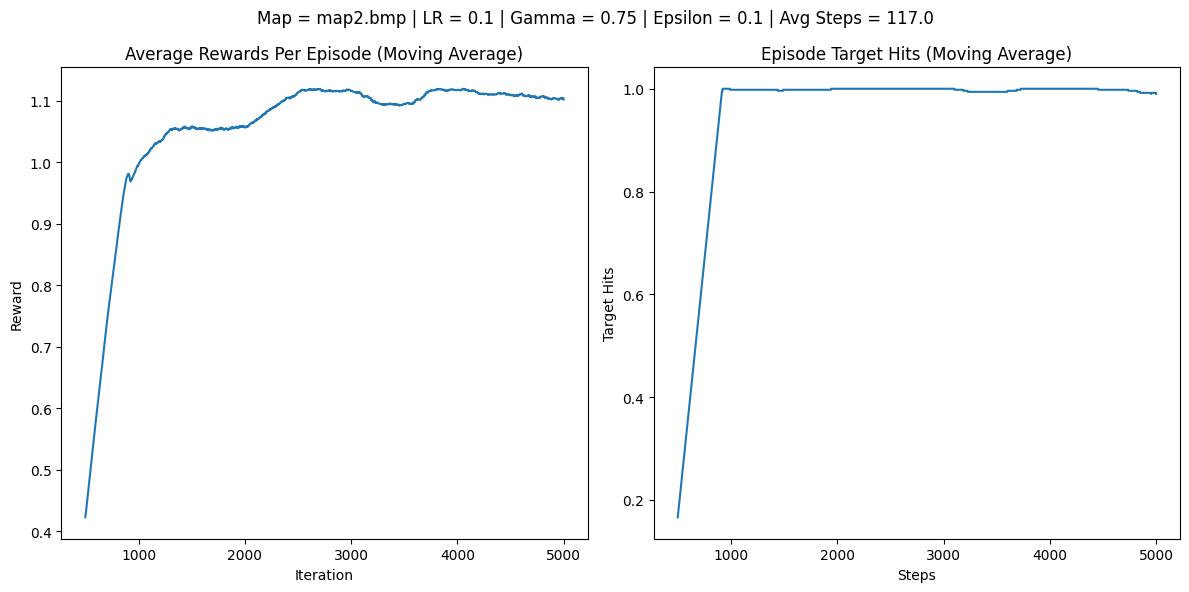

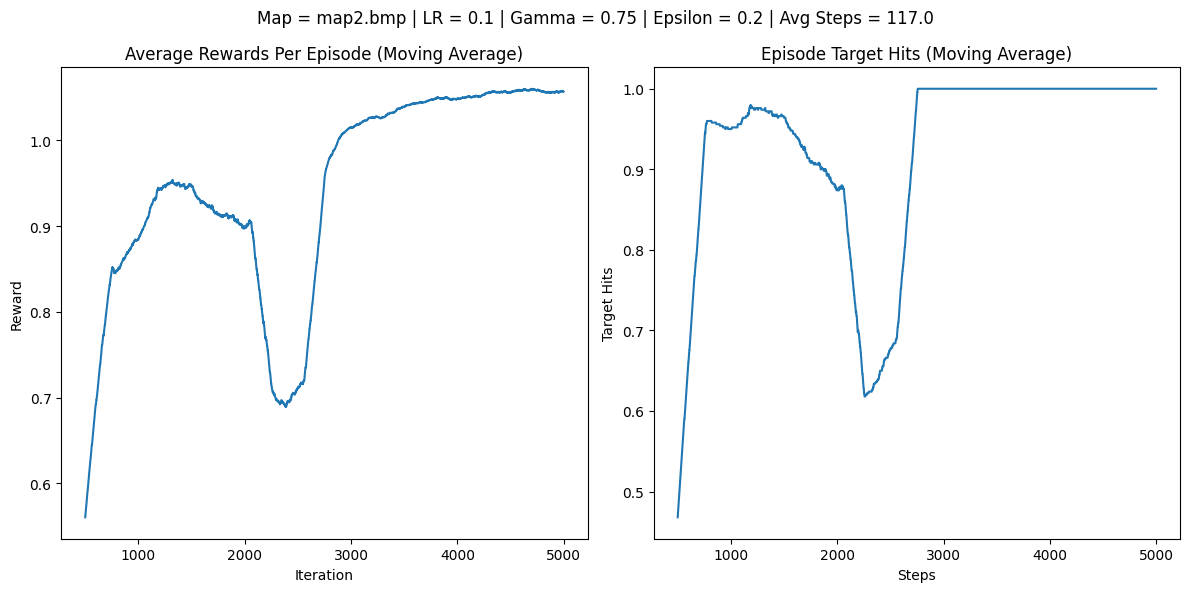

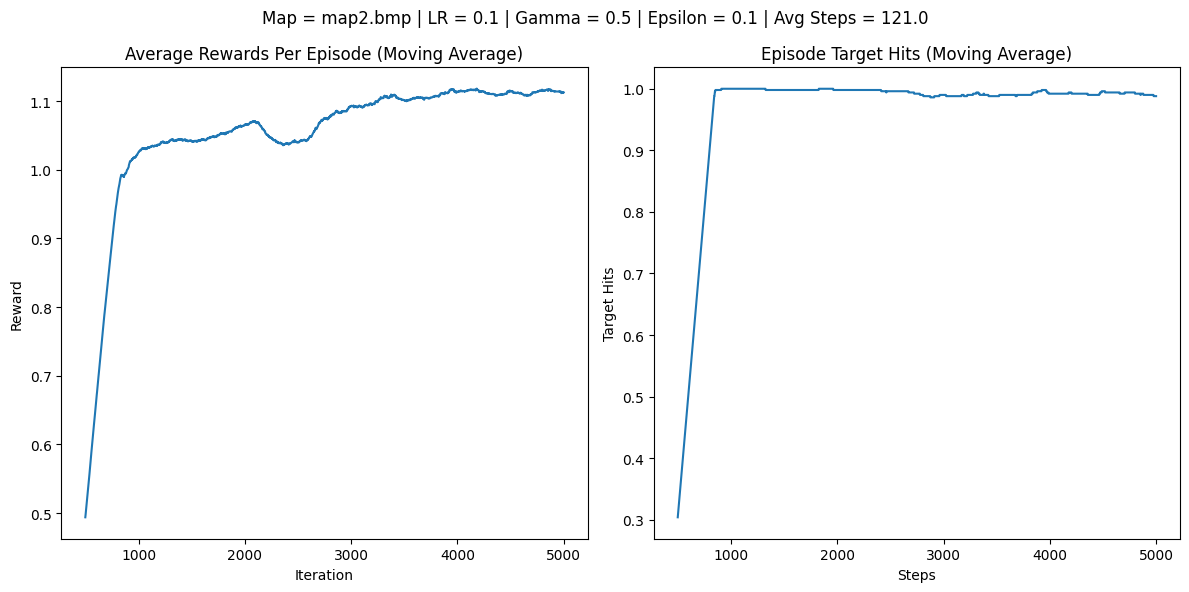

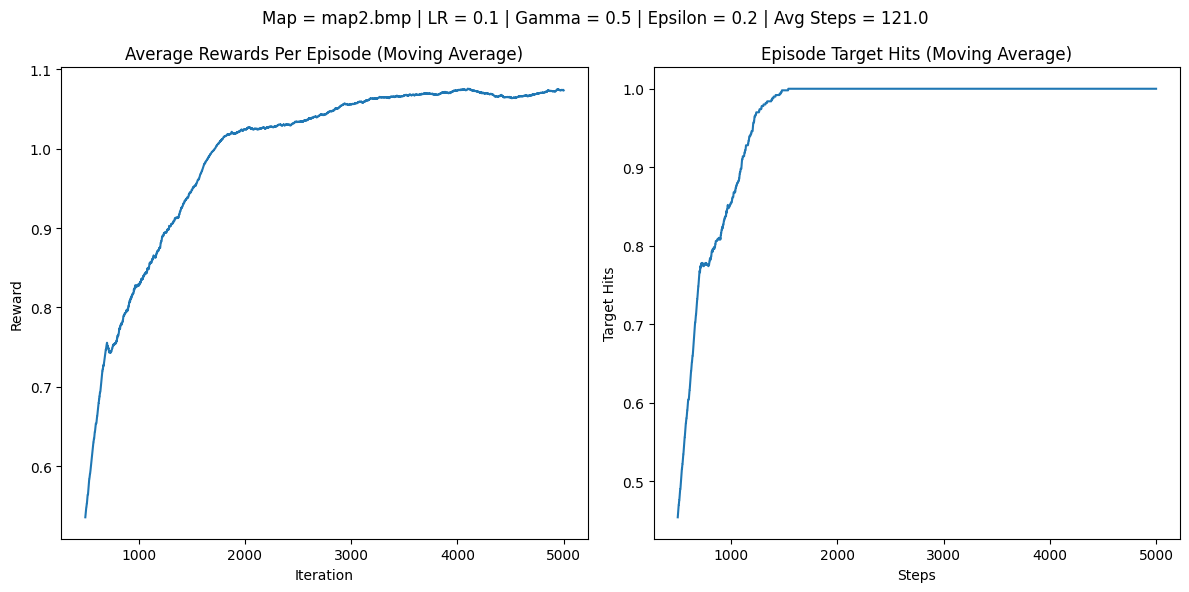

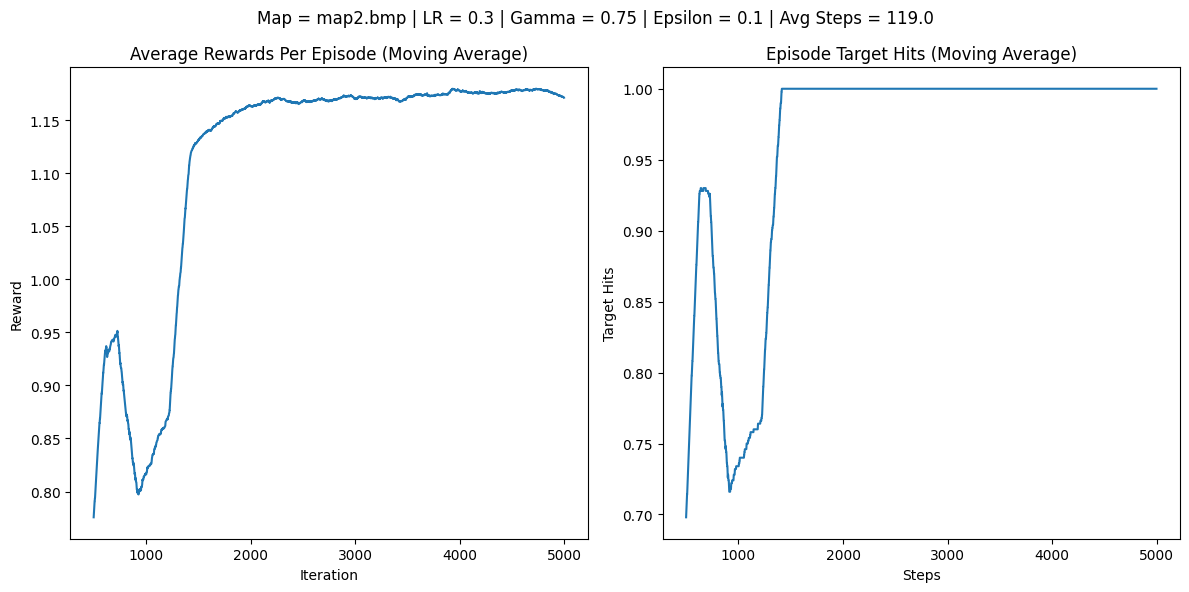

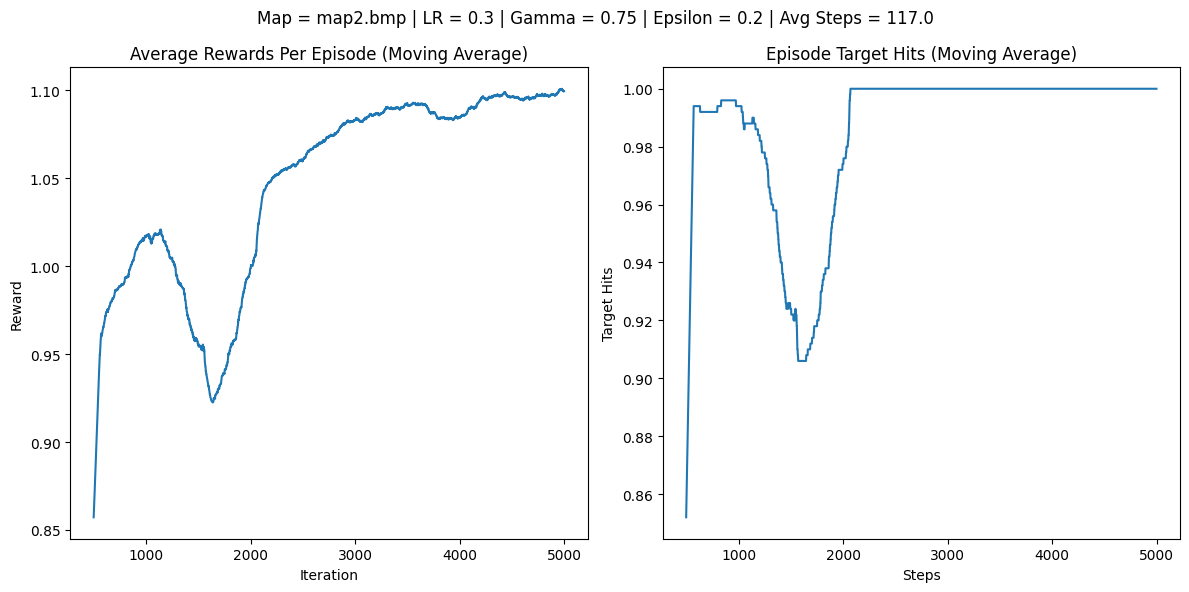

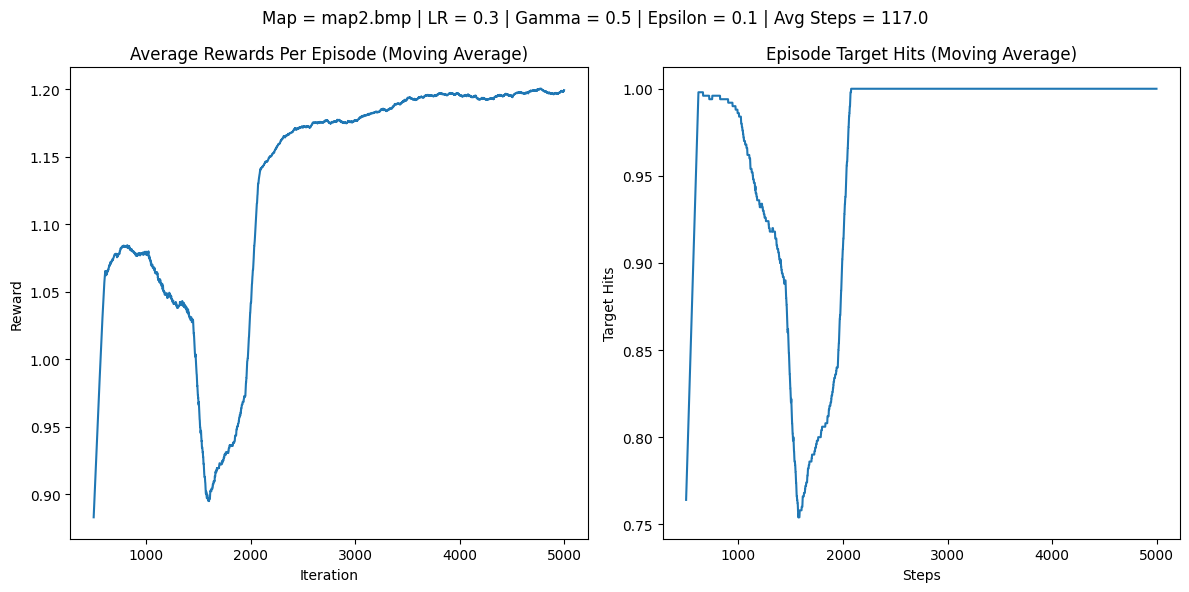

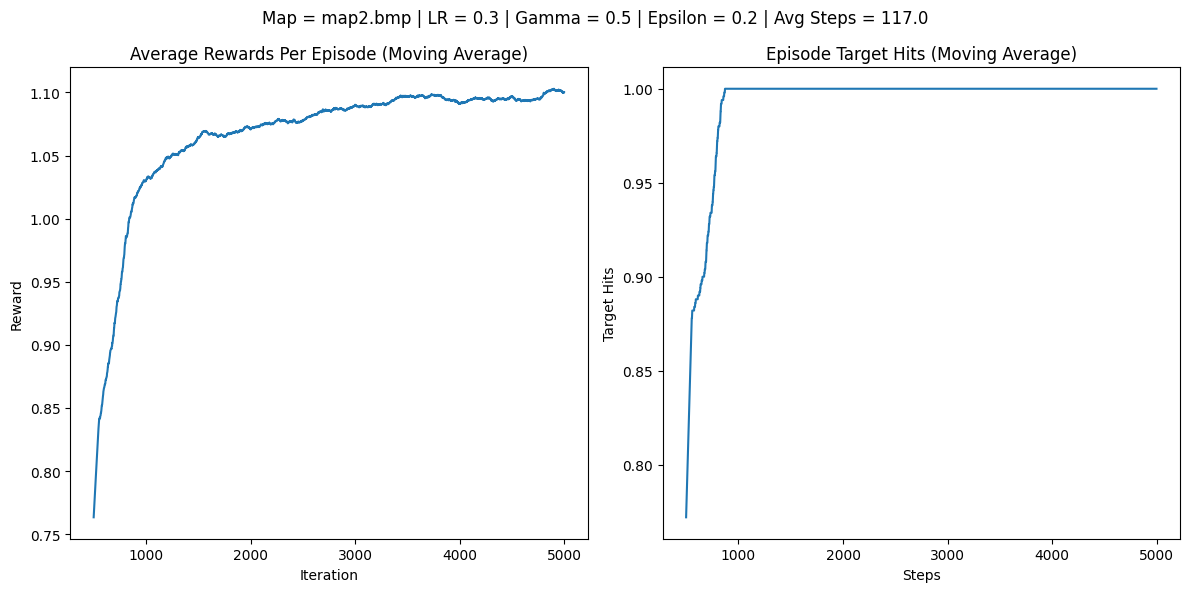

In [2]:
maps = ['map1.bmp', 'map2.bmp']
learning_rates = [.1, .3]
gamma = [.75, .5]
epislon = [.1, .2]

combinations = [[m, l, g, e] for m in maps for l in learning_rates for g in gamma for e in epislon]

results = []
print("Combinations: ", len(combinations))
for m, l, g,e in combinations:
    agent, environment, avg_rewards, episode_target_hit_history = run_learning(image_path=m, learning_rate=l, gamma=g, epsilon=e, episode_length=5000)
    score, results, avg_steps = environment.evaluate_agent(agent, 1)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    rewards_rolling = get_moving_average(avg_rewards)
    fig.suptitle(f"Map = {m} | LR = {l} | Gamma = {g} | Epsilon = {e} | Avg Steps = {avg_steps}")
    fig.set_figheight(6)
    fig.set_figwidth(12)
    ax1.plot(rewards_rolling)
    ax1.set_title("Average Rewards Per Episode (Moving Average)")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Reward")


    target_hits_rolling = get_moving_average(episode_target_hit_history)
    ax2.plot(target_hits_rolling)
    ax2.set_title("Episode Target Hits (Moving Average)")
    ax2.set_ylabel("Target Hits")
    ax2.set_xlabel("Steps")
    plt.tight_layout()
    plt.savefig(f'./p2-figs/m_{m.replace(".bmp", "")}_l_{l}_g_{g}_e_{e}.png')

    results.append({ 'map': m, 'learning_rate': l, 'gamma': g, 'epsilon': e, 'avg_steps': avg_steps })

In [3]:
results_df = pd.DataFrame(results)
results_df.to_csv("sp_training_results.csv")